# Downlaoding Dataset

In [26]:
import os
print("*"*50)
if not os.path.isfile("pima-indians-diabetes.csv"):
    print("Downloading...")
    !gdown "https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv/download?datasetVersionNumber=1" -O "pima-indians-diabetes.csv"
    print("Downloading Done!")
else:
    print("File Already exists!!!")
print("*"*50)

**************************************************
File Already exists!!!
**************************************************


# Loading Dataset

In [2]:
import numpy as np
import pandas as pd


ds = pd.read_csv("./pima-indians-diabetes.csv",names=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Class"])

ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X_ds,y_ds = ds.values[:,:-1],ds.values[:,-1]
print("X_ds:",X_ds[:5])
print("y_ds:",y_ds[:5])

X_ds: [[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
y_ds: [1. 0. 1. 0. 1.]


# Spliting Dataset

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ds, y_ds, test_size=0.3, random_state=42)

print("X_train shape: ",X_train.shape)
print("y_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",X_test.shape)

X_train shape:  (537, 8)
y_train shape:  (537, 8)
X_test shape:  (231, 8)
y_test shape:  (231, 8)


# Traning Model

## Defining eval function for models

In [5]:
%pip install matplotlib seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, log_loss, hamming_loss, jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate and plot results
def evaluate_model(model, X_test, y_test):
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC Curve
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    # Calculate additional evaluation metrics
    print("### Additional Evaluation Metrics ###")
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    auc_pr = auc(recall, precision)
    mcc = matthews_corrcoef(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    gini = 2 * roc_auc - 1
    kappa = cohen_kappa_score(y_test, y_pred)
    logloss = log_loss(y_test, y_scores)
    hammingloss = hamming_loss(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    
    # Print or store additional metrics
    print(f"AUC-PR: {auc_pr:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Gini Coefficient: {gini:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    print(f"Log Loss: {logloss:.4f}")
    print(f"Hamming Loss: {hammingloss:.4f}")
    print(f"Jaccard Similarity Coefficient: {jaccard:.4f}")
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


## Model 1 Logistic Regression

In [7]:
# scling x and y for Logistic Regression
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_train_scaled, y_train)

In [9]:
clf.predict_proba([X_train_scaled[10]]),clf.predict([X_train[10]])

(array([[0.950643, 0.049357]]), array([1.]))

Accuracy: 0.7359
Precision: 0.6173
Recall: 0.6250
F1 Score: 0.6211
ROC AUC: 0.7978
Confusion Matrix:
[[120  31]
 [ 30  50]]
### Additional Evaluation Metrics ###
AUC-PR: 0.6635
Matthews Correlation Coefficient: 0.4185
Balanced Accuracy: 0.7099
Gini Coefficient: 0.5957
Cohen's Kappa: 0.4185
Log Loss: 0.5228
Hamming Loss: 0.2641
Jaccard Similarity Coefficient: 0.4505


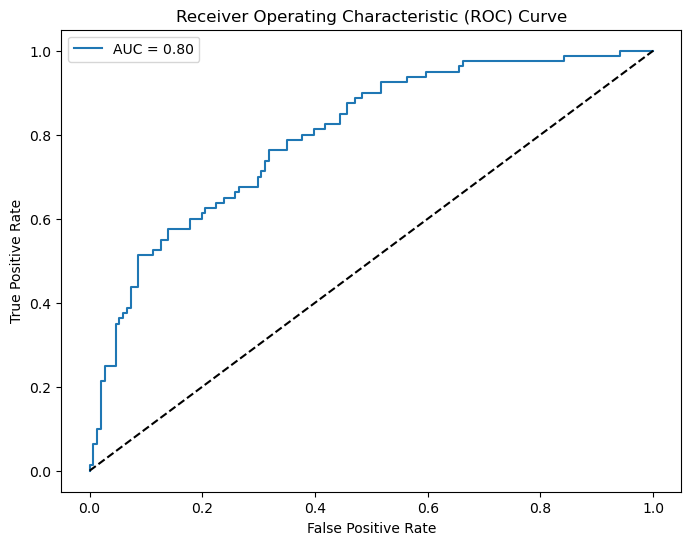

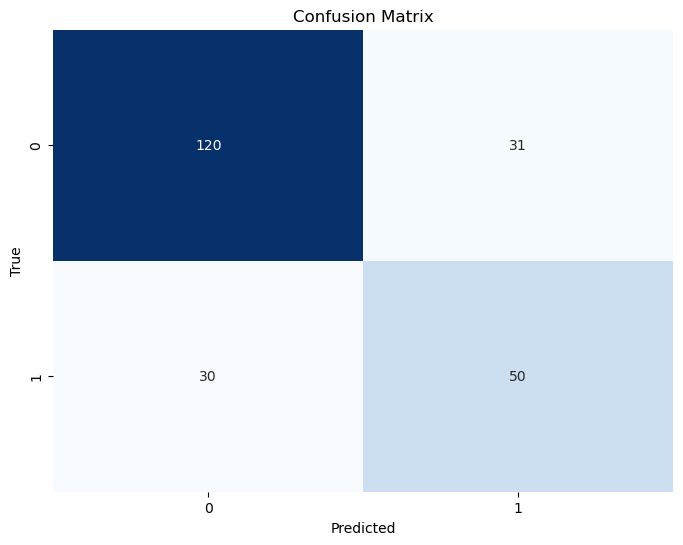

In [10]:
evaluate_model(clf,X_test=X_test_scaled,y_test=y_test)

## Model 2 Decision Trees

In [11]:
# scling x and y for Decision Trees
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)

In [13]:
clf.predict_proba([X_train_scaled[10]]),clf.predict([X_train[10]])

(array([[1., 0.]]), array([1.]))

Accuracy: 0.6840
Precision: 0.5361
Recall: 0.6500
F1 Score: 0.5876
ROC AUC: 0.6760
Confusion Matrix:
[[106  45]
 [ 28  52]]
### Additional Evaluation Metrics ###
AUC-PR: 0.6536
Matthews Correlation Coefficient: 0.3393
Balanced Accuracy: 0.6760
Gini Coefficient: 0.3520
Cohen's Kappa: 0.3352
Log Loss: 11.3904
Hamming Loss: 0.3160
Jaccard Similarity Coefficient: 0.4160


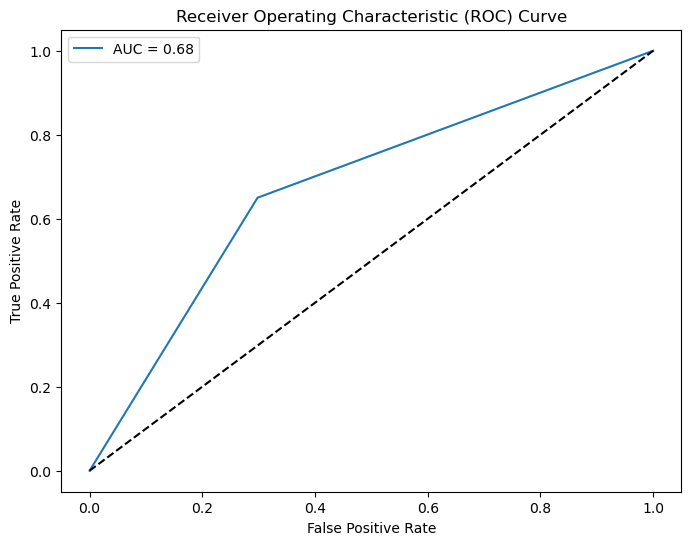

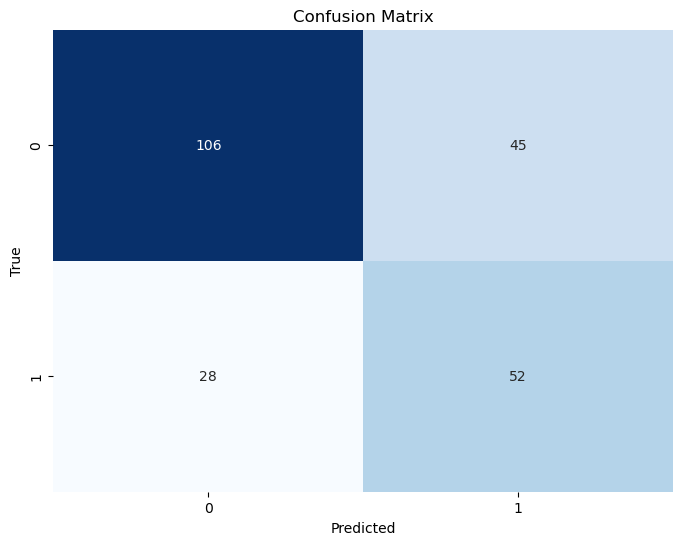

In [14]:
evaluate_model(clf,X_test=X_test_scaled,y_test=y_test)

## Model 3 Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_estimators=100).fit(X_train_scaled, y_train)

In [16]:
clf.predict_proba([X_train_scaled[10]]),clf.predict([X_train[10]])

(array([[0.99, 0.01]]), array([1.]))

Accuracy: 0.7576
Precision: 0.6538
Recall: 0.6375
F1 Score: 0.6456
ROC AUC: 0.8056
Confusion Matrix:
[[124  27]
 [ 29  51]]
### Additional Evaluation Metrics ###
AUC-PR: 0.6756
Matthews Correlation Coefficient: 0.4615
Balanced Accuracy: 0.7293
Gini Coefficient: 0.6112
Cohen's Kappa: 0.4614
Log Loss: 0.5046
Hamming Loss: 0.2424
Jaccard Similarity Coefficient: 0.4766


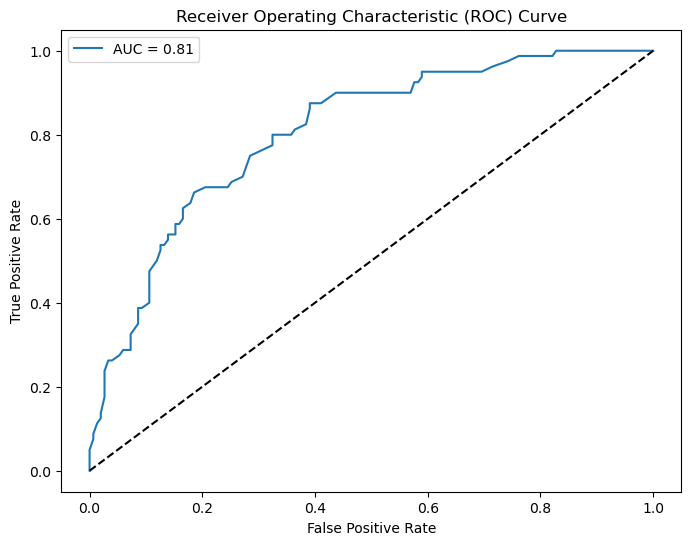

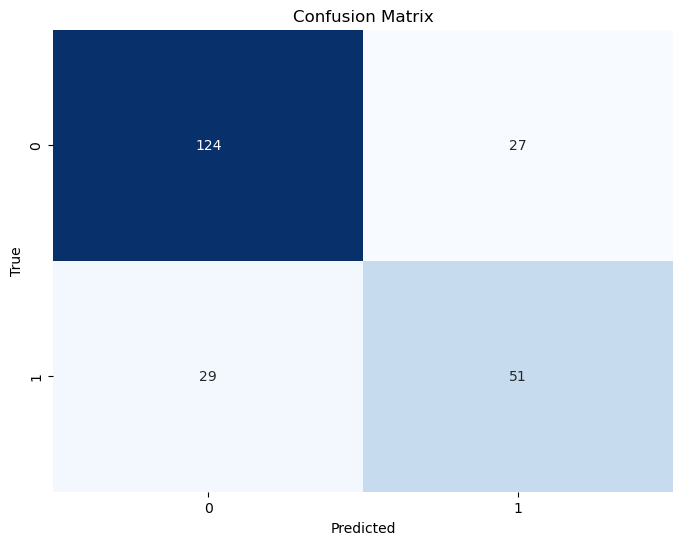

In [17]:
evaluate_model(clf,X_test=X_test_scaled,y_test=y_test)

## Model 4 Support Vector Machine (SVM)

In [18]:
# scling x and y for SVM

from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.svm import SVC
clf = SVC(random_state=0,gamma='auto',probability=True).fit(X_train_scaled, y_train)

In [20]:
clf.predict_proba([X_train_scaled[10]]),clf.predict([X_train[10]])

(array([[0.90441876, 0.09558124]]), array([0.]))

Accuracy: 0.7446
Precision: 0.6438
Recall: 0.5875
F1 Score: 0.6144
ROC AUC: 0.7974
Confusion Matrix:
[[125  26]
 [ 33  47]]
### Additional Evaluation Metrics ###
AUC-PR: 0.6464
Matthews Correlation Coefficient: 0.4250
Balanced Accuracy: 0.7077
Gini Coefficient: 0.5947
Cohen's Kappa: 0.4240
Log Loss: 0.5220
Hamming Loss: 0.2554
Jaccard Similarity Coefficient: 0.4434


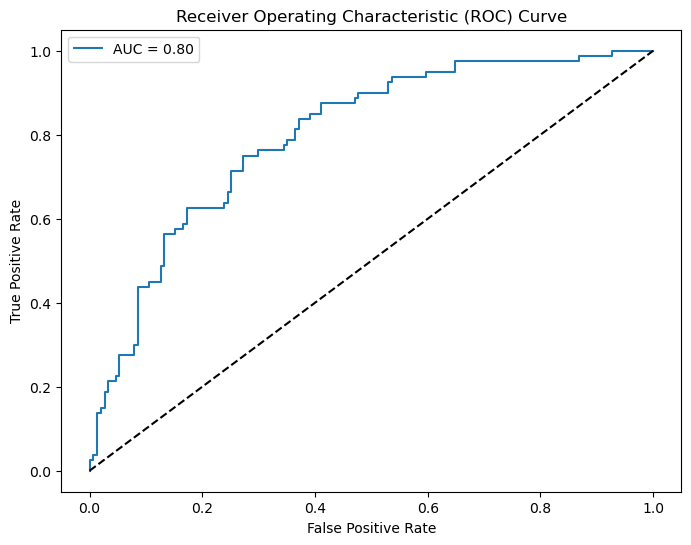

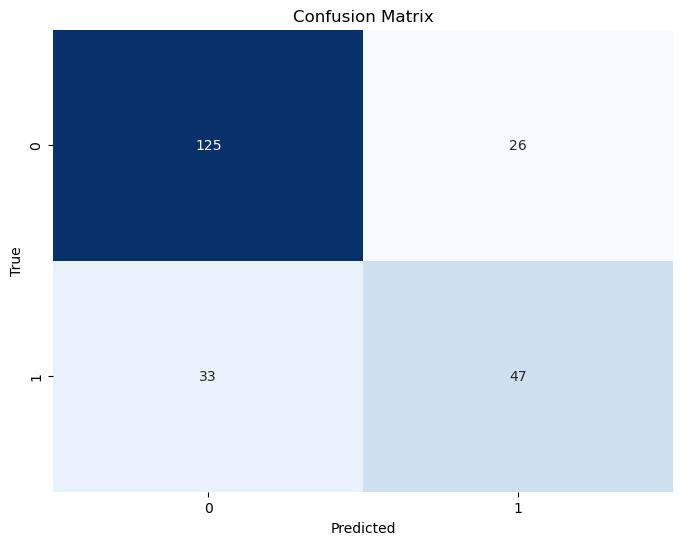

In [21]:
evaluate_model(clf,X_test=X_test_scaled,y_test=y_test)

## Model 5 Neural Networks

In [22]:
# scling x and y for neural networks

from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=0,hidden_layer_sizes=(100,3), max_iter=10000).fit(X_train_scaled, y_train)

In [24]:
clf.predict_proba([X_train_scaled[10]]),clf.predict([X_train[10]])

(array([[9.99888995e-01, 1.11005461e-04]]), array([1.]))

Accuracy: 0.7013
Precision: 0.5663
Recall: 0.5875
F1 Score: 0.5767
ROC AUC: 0.7293
Confusion Matrix:
[[115  36]
 [ 33  47]]
### Additional Evaluation Metrics ###
AUC-PR: 0.6034
Matthews Correlation Coefficient: 0.3462
Balanced Accuracy: 0.6745
Gini Coefficient: 0.4586
Cohen's Kappa: 0.3460
Log Loss: 1.9141
Hamming Loss: 0.2987
Jaccard Similarity Coefficient: 0.4052


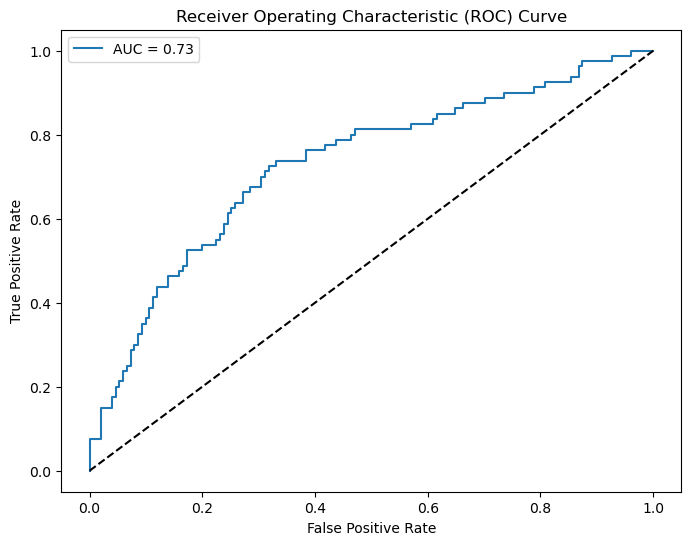

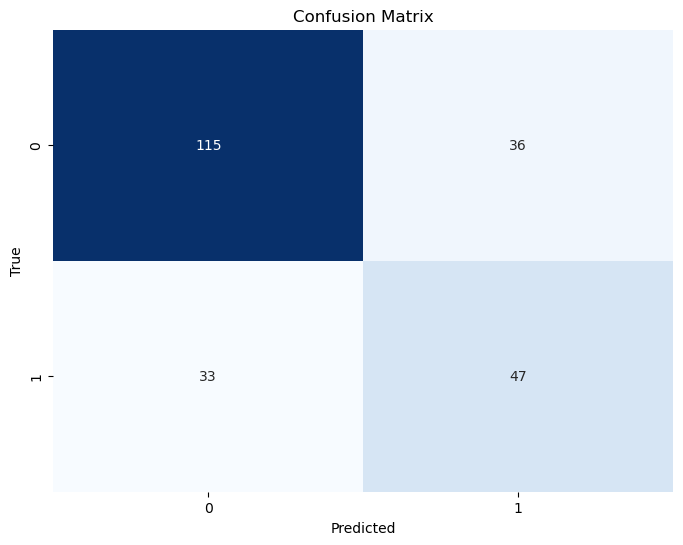

In [25]:
evaluate_model(clf,X_test=X_test_scaled,y_test=y_test)